# K-Means Clustering

<hr style="height:2px;border-width:0;color:black;background-color:black">

<p dir="ltr" style="line-height:1.38;background-color:#ffffff;margin-top:0pt;margin-bottom:0pt;"><span style="font-size:10.5pt;font-family:Arial;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">Download the&nbsp;</span><a href="https://ac-101708228-virtuoso-prod.s3.amazonaws.com/uploads/download/64/bank_marketing.csv" style="text-decoration:none;"><span style="font-size:10.5pt;font-family:Arial;color:#1155cc;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:underline;-webkit-text-decoration-skip:none;text-decoration-skip-ink:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">bank marketing dataset</span></a><span style="font-size:10.5pt;font-family:Arial;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">&nbsp;and save it to the same location as this script. Then run the code below to read this dataset.</span></p>
<p dir="ltr" style="line-height:1.38;background-color:#ffffff;margin-top:0pt;margin-bottom:0pt;padding:11pt 0pt 0pt 0pt;"><span style="font-size:10.5pt;font-family:Arial;color:#000000;background-color:transparent;font-weight:400;font-style:normal;font-variant:normal;text-decoration:none;vertical-align:baseline;white-space:pre;white-space:pre-wrap;">
This dataset represents a marketing campaign made by a Portuguese bank where they contacted a number of people and tracked their personal details.
    
You'll use it to segment these customers into discrete groups using k-means analysis.</span></p>

In [1]:
import pandas as pd

bank_marketing_dataset = pd.read_csv("bank_marketing.csv")
bank_marketing_dataset.head()

,age,job,marital,education,defaulted,mortgage,personal_loan,contact,month,day_of_week,duration,times_contacted,previous_campaign_outcome,employment_variation_rate,consumer_price_index,consumer_confidence_index,euribor_rate,number_employees,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<hr style="height:2px;border-width:0;color:black;background-color:black">

Use the scatter_matrix() function to create a matrix of scatter plots to see if there are any natural clusters in our data.

Don't be afraid to make the judgment that there are no natural clusters when comparing any two columns.

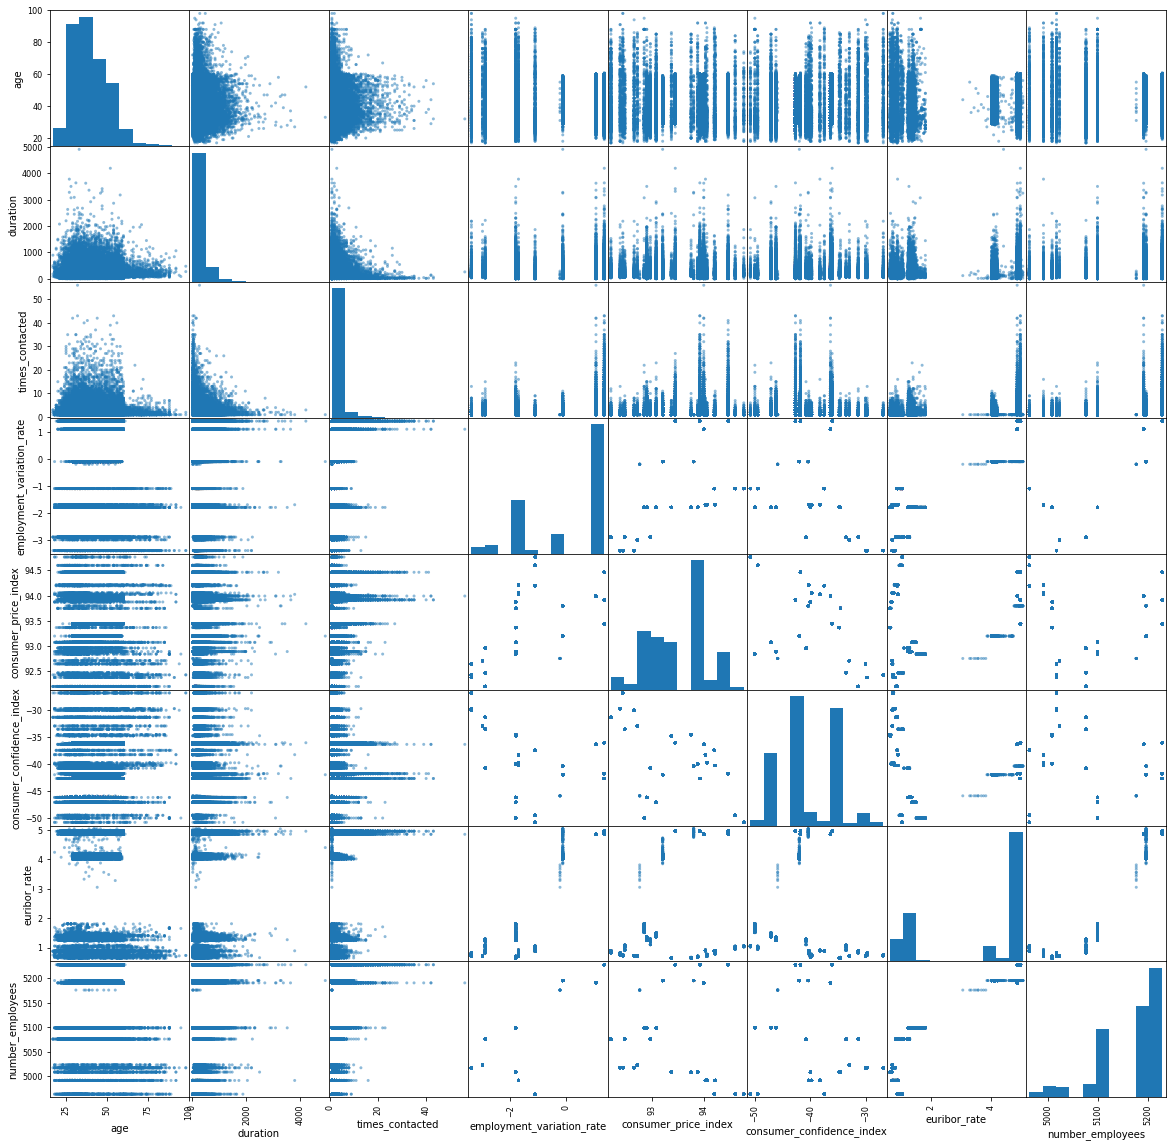

In [2]:
#We use the scatter_matrix() function from the plotting portion of the pandas library
#For the first argument, we just specify the variable containing the dataframe
#For the second argument, we can specify the figure size
#This is down to personal choice, but I chose 15x15
pd.plotting.scatter_matrix(bank_marketing_dataset,figsize=[20,20]);

#If we look at the scatter plot below, we can see that none of these scatters show clear noticeable clusters
#Some have faint natural clusters, but not really anything solid enough for us 

In [3]:
#Below we use the get_dummies() function to convert categorical features to dummy features
#We use the drop_first=True argument to automatically drop the first dummy variable from each category
#This removes redundant data
bank_marketing_dataset=pd.get_dummies(bank_marketing_dataset,drop_first=True)
bank_marketing_dataset.head()

,age,duration,times_contacted,employment_variation_rate,consumer_price_index,consumer_confidence_index,euribor_rate,number_employees,job_blue-collar,job_entrepreneur,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,previous_campaign_outcome_nonexistent,previous_campaign_outcome_success,subscribed_yes
0,56,261,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,57,149,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,37,226,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,40,151,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,56,307,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,0,1,0,0,0,1,0,0


<hr style="height:2px;border-width:0;color:black;background-color:black">

Create an elbow method chart to help determine the optimal number of clusters to choose for this dataset.

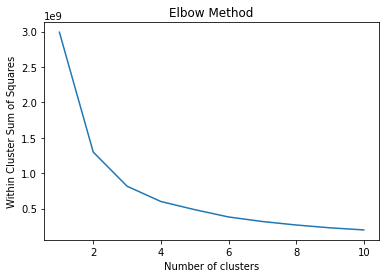

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
elbow = []

#First we set up the for loop to iterate 10 times
for i in range(1,11):
    #We then set the KMeans function to a variable
    #We then set n_clusters to equal i
    kmc = KMeans(n_clusters=i)
    #We then use the .fit() method to fit the model 
    kmc.fit(bank_marketing_dataset)
    #Then we append the error for that model to the elbow variable
    elbow.append(kmc.inertia_)

plt.plot(range(1, 11), elbow)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.show()

<hr style="height:2px;border-width:0;color:black;background-color:black">

Based on the elbow method chart above, set a value for K, build your k-means model, and output the cluster predictions. These predictions will tell you which segment each customer belongs to.

In [5]:
#First we set a value for K
#I chose 4 because the drop in error is more gradual from 5 onwards
K=4

#We then set the kmc variable to equal the KMeans function
#The only parameter we need to set is n_clusters=K
kmc = KMeans(n_clusters=K)
#We wet the cluster variable to equal the output of the .fit_predict() method
#This is applied to the kmc variable and takes our dataframe as an argument
cluster = kmc.fit_predict(bank_marketing_dataset)

bank_marketing_dataset["Cluster"] = cluster
bank_marketing_dataset.head()

,age,duration,times_contacted,employment_variation_rate,consumer_price_index,consumer_confidence_index,euribor_rate,number_employees,job_blue-collar,job_entrepreneur,...,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,previous_campaign_outcome_nonexistent,previous_campaign_outcome_success,subscribed_yes,Cluster
0,56,261,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,57,149,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,1,0,0,0,1,0,0,3
2,37,226,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,1,0,0,0,1,0,0,3
3,40,151,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,1,0,0,0,1,0,0,3
4,56,307,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,1,0,0,0,1,0,0,0
